In [1]:
import cv2
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../csv/DL_info.csv')
df.head()

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
0,000001_01_01_109.png,1,1,1,109,"233.537, 95.0204, 234.057, 106.977, 231.169, 1...","226.169, 90.0204, 241.252, 111.977","11.9677, 5.10387","0.44666, 0.283794, 0.434454",3,0,"103, 115","0.488281, 0.488281, 5","512, 512","-175, 275",F,62.0,3
1,000001_02_01_014.png,1,2,1,14,"224.826, 289.296, 224.016, 305.294, 222.396, 2...","217.396, 284.296, 233.978, 310.294","16.019, 6.61971","0.431015, 0.485238, 0.340745",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
2,000001_02_01_017.png,1,2,1,17,"272.323, 320.763, 246.522, 263.371, 234.412, 3...","229.412, 258.371, 285.221, 325.763","62.9245, 48.9929","0.492691, 0.503106, 0.351754",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
3,000001_03_01_088.png,1,3,1,88,"257.759, 157.618, 260.018, 133.524, 251.735, 1...","246.735, 128.524, 270.288, 162.618","24.1998, 13.6123","0.498999, 0.278924, 0.452792",3,0,"58, 118","0.732422, 0.732422, 1","512, 512","-175, 275",F,73.0,3
4,000001_04_01_017.png,1,4,1,17,"304.019, 230.585, 292.217, 211.789, 304.456, 2...","287.217, 206.789, 309.456, 235.585","22.1937, 9.8065","0.572678, 0.42336, 0.445674",3,0,"11, 23","0.666016, 0.666016, 5","512, 512","-175, 275",F,73.0,3


In [24]:
df[:10]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
0,000001_01_01_109.png,1,1,1,109,"233.537, 95.0204, 234.057, 106.977, 231.169, 1...","226.169, 90.0204, 241.252, 111.977","11.9677, 5.10387","0.44666, 0.283794, 0.434454",3,0,"103, 115","0.488281, 0.488281, 5","512, 512","-175, 275",F,62.0,3
1,000001_02_01_014.png,1,2,1,14,"224.826, 289.296, 224.016, 305.294, 222.396, 2...","217.396, 284.296, 233.978, 310.294","16.019, 6.61971","0.431015, 0.485238, 0.340745",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
2,000001_02_01_017.png,1,2,1,17,"272.323, 320.763, 246.522, 263.371, 234.412, 3...","229.412, 258.371, 285.221, 325.763","62.9245, 48.9929","0.492691, 0.503106, 0.351754",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
3,000001_03_01_088.png,1,3,1,88,"257.759, 157.618, 260.018, 133.524, 251.735, 1...","246.735, 128.524, 270.288, 162.618","24.1998, 13.6123","0.498999, 0.278924, 0.452792",3,0,"58, 118","0.732422, 0.732422, 1","512, 512","-175, 275",F,73.0,3
4,000001_04_01_017.png,1,4,1,17,"304.019, 230.585, 292.217, 211.789, 304.456, 2...","287.217, 206.789, 309.456, 235.585","22.1937, 9.8065","0.572678, 0.42336, 0.445674",3,0,"11, 23","0.666016, 0.666016, 5","512, 512","-175, 275",F,73.0,3
5,000002_01_01_162.png,2,1,1,162,"238.314, 261.228, 235.858, 268.594, 240.36, 26...","229.222, 256.228, 245.36, 273.594","7.76388, 6.77335","0.437715, 0.573812, 0.609054",2,0,"156, 168","0.859375, 0.859375, 5","512, 512","-175, 275",F,51.0,2
6,000002_01_01_176.png,2,1,1,176,"275.758, 191.194, 261.137, 190.799, 269.83, 18...","256.137, 180.662, 280.758, 200.541","14.6261, 9.87891","0.508777, 0.438113, 0.66217",2,0,"170, 182","0.859375, 0.859375, 5","512, 512","-175, 275",F,51.0,2
7,000002_02_01_077.png,2,2,1,77,"240.988, 215.969, 228.479, 219.186, 235.984, 2...","223.479, 207.395, 245.988, 228.475","12.9166, 11.6422","0.43167, 0.47806, 0.702035",2,0,"44, 83","0.976562, 0.976562, 5","512, 512","-175, 275",F,59.0,2
8,000002_02_01_050.png,2,2,1,50,"313.615, 261.093, 293.88, 259.183, 302.156, 25...","288.88, 248.135, 318.615, 274.051","19.8278, 15.9952","0.596974, 0.57036, 0.60468",2,0,"44, 83","0.976562, 0.976562, 5","512, 512","-175, 275",F,59.0,2
9,000002_02_01_065.png,2,2,1,65,"289.383, 205.23, 277.907, 202.448, 285.21, 198...","272.907, 193.623, 294.383, 214.055","11.8077, 10.5244","0.536447, 0.458577, 0.661835",2,0,"44, 83","0.976562, 0.976562, 5","512, 512","-175, 275",F,59.0,2


In [4]:
file_names = df['File_name'].tolist()

In [28]:
f = file_names[0]

print('_'.join(f.split('_')[0:3])+'/'+f.split('_')[-1])

000001_01_01/109.png


In [11]:
print('_'.join(f.split('_')[0:3]))

000001_01_01


In [20]:
files_available = {}

for f in file_names:
    root = '_'.join(f.split('_')[0:3])
    files_available[str(root)] = []

for f in file_names :
    root = '_'.join(f.split('_')[0:3])
    
    if root in files_available.keys():
        
        file = f.split('_')[-1]
        files_available[root].append(file)
    # files_available[str(root)] = []

In [22]:
for k, v in files_available.items():
    print(k,len(v))

000001_01_01 1
000001_02_01 2
000001_03_01 1
000001_04_01 1
000002_01_01 2
000002_02_01 4
000002_03_01 1
000003_01_01 1
000004_01_01 1
000004_02_01 1
000004_02_02 2
000004_03_01 1
000004_03_02 1
000005_01_01 1
000006_01_01 1
000006_02_01 1
000007_01_01 1
000007_02_01 1
000007_03_01 2
000007_03_02 1
000008_01_01 1
000008_02_01 3
000009_01_01 1
000009_02_01 2
000009_03_01 1
000009_04_01 1
000009_04_02 2
000009_04_03 1
000010_01_01 1
000010_02_01 1
000010_02_02 1
000012_01_01 1
000012_02_01 1
000012_03_01 1
000012_04_01 1
000013_01_01 1
000014_01_01 1
000014_02_01 2
000015_01_01 2
000015_02_01 4
000016_01_01 4
000016_02_01 4
000017_01_01 1
000017_02_01 2
000019_01_01 1
000019_02_01 1
000019_03_01 3
000020_01_01 1
000020_02_01 1
000020_03_01 3
000020_04_01 3
000021_01_01 1
000021_02_01 1
000021_03_01 2
000021_04_01 1
000022_01_01 1
000022_02_01 2
000022_02_02 1
000022_03_01 1
000024_01_01 2
000024_02_01 2
000025_01_01 1
000025_02_01 1
000026_01_01 1
000026_02_01 2
000026_03_01 4
000026_04_

In [21]:
files_available

{'000001_01_01': ['109.png'],
 '000001_02_01': ['014.png', '017.png'],
 '000001_03_01': ['088.png'],
 '000001_04_01': ['017.png'],
 '000002_01_01': ['162.png', '176.png'],
 '000002_02_01': ['077.png', '050.png', '065.png', '052.png'],
 '000002_03_01': ['041.png'],
 '000003_01_01': ['016.png'],
 '000004_01_01': ['007.png'],
 '000004_02_01': ['013.png'],
 '000004_02_02': ['073.png', '145.png'],
 '000004_03_01': ['008.png'],
 '000004_03_02': ['136.png'],
 '000005_01_01': ['052.png'],
 '000006_01_01': ['062.png'],
 '000006_02_01': ['062.png'],
 '000007_01_01': ['173.png'],
 '000007_02_01': ['073.png'],
 '000007_03_01': ['057.png', '052.png'],
 '000007_03_02': ['066.png'],
 '000008_01_01': ['033.png'],
 '000008_02_01': ['751.png', '641.png', '801.png'],
 '000009_01_01': ['069.png'],
 '000009_02_01': ['065.png', '099.png'],
 '000009_03_01': ['042.png'],
 '000009_04_01': ['060.png'],
 '000009_04_02': ['022.png', '086.png'],
 '000009_04_03': ['101.png'],
 '000010_01_01': ['084.png'],
 '000010_

In [7]:
df['Patient_age'].value_counts()

61.0     1093
64.0     1043
62.0     1035
65.0     1011
58.0     1009
         ... 
96.0        2
91.0        2
5.0         2
90.0        1
157.0       1
Name: Patient_age, Length: 95, dtype: int64

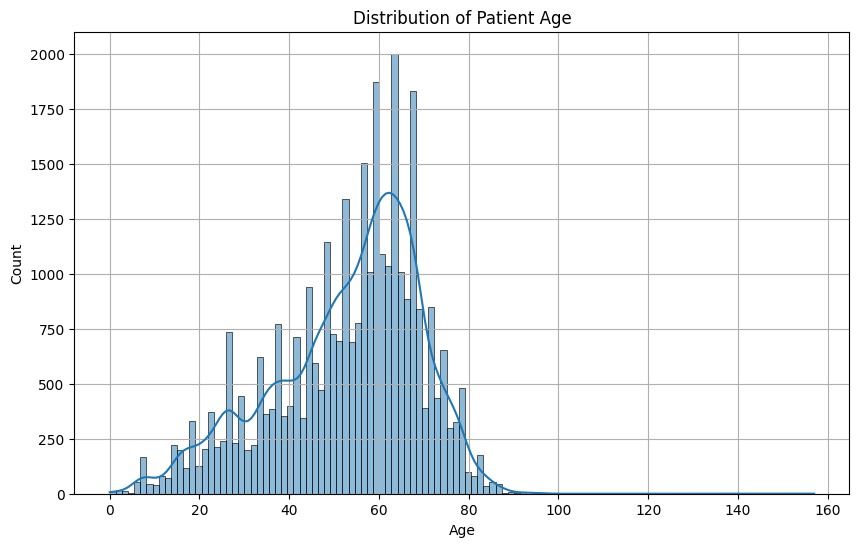

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_statistics = df.describe()

# Distribution of key categorical columns
gender_distribution = df['Patient_gender'].value_counts()
lesion_type_distribution = df['Coarse_lesion_type'].value_counts()
train_val_test_distribution = df['Train_Val_Test'].value_counts()

# Visualize distributions for 'Patient_age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Patient_age'].dropna(), kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


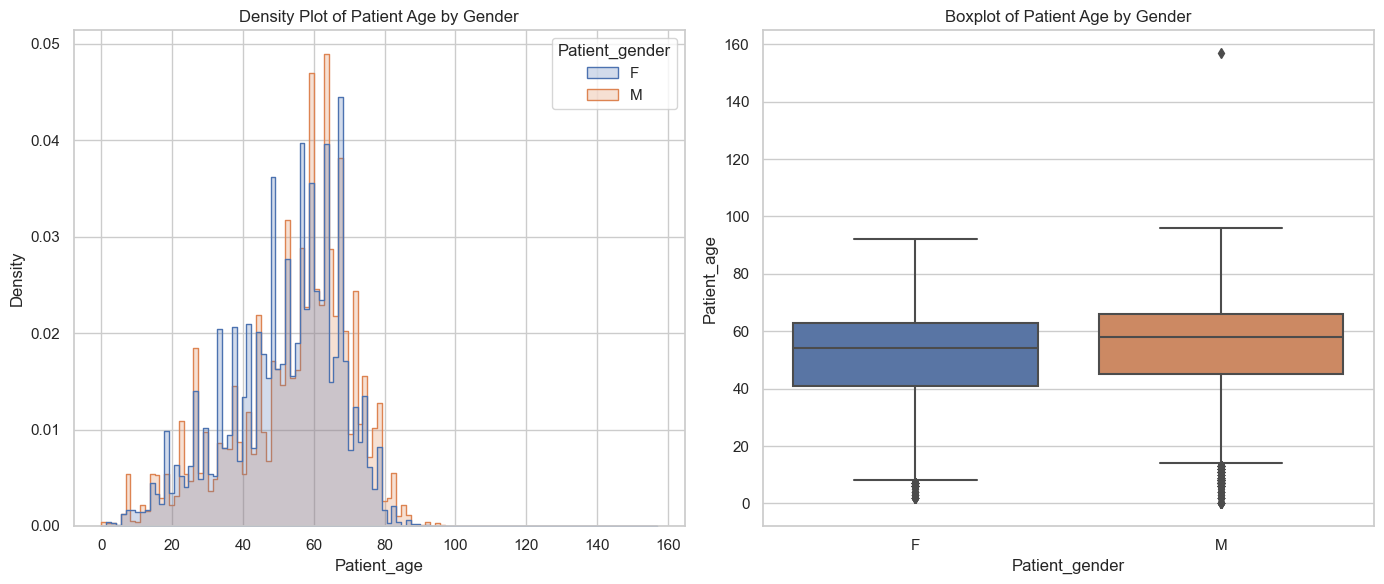

In [6]:
''' 
Relationship between patient age and patient gender 

Female Patients: The average age is approximately 51.6 years, with a standard deviation of about 15.7 years. 
The ages range from 2 to 92 years.
Male Patients: The average age is slightly higher at around 54.0 years, with a standard deviation of 16.8 years. 
The age range for male patients is from 0 to 157 years (though the maximum age of 157 might indicate a data entry error).

'''
# Setting up the visualisation style
sns.set(style="whitegrid")

# Descriptive statistics for patient age by gender
age_gender_stats = df.groupby('Patient_gender')['Patient_age'].describe()

# Plotting distributions of age for each gender
plt.figure(figsize=(14, 6))

# Histogram/Density plot for age distribution by gender
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Patient_age", hue="Patient_gender", element="step", stat="density", common_norm=False)
plt.title("Density Plot of Patient Age by Gender")

# Boxplot for age distribution by gender
plt.subplot(1, 2, 2)
sns.boxplot(x="Patient_gender", y="Patient_age", data=df)
plt.title("Boxplot of Patient Age by Gender")

plt.tight_layout()
plt.show()
